#  Prostate Cancer: Biomarkers and Classification Analysis
Author: *Justin Chelliah*

Objective: Exploring a prostate cancer dataset to analyze key biomarkers and apply classification modeling using a Random Forest model.

The dataset used in this analysis originates from a study by Stamey et al. (1989) and is sourced from Kaggle, which explored the relationship between prostate-specific antigen (PSA) levels and various clinical variables in 97 men scheduled for radical prostatectomy. PSA is a protein produced by the prostate gland, and elevated PSA levels are commonly linked to an increased risk of prostate cancer. This dataset offers valuable insights into how PSA correlates with other clinical indicators, providing a useful foundation for studying diagnostic and prognostic factors in prostate cancer.

Raw Data Source: https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data

Kaggle Source: https://www.kaggle.com/datasets/soujanyahp/prostate-cancer-dataset/data

Table of Contents
1. Loading the Dataset
2. Data Overview
3. Visualizing Key Biomarkers
4. Classification Model
5. Feature Importance
6. Logistic Regression Model
7. ROC Curve Analysis
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

##  1. Loading the Dataset

In [2]:
df = pd.read_csv("prostate.csv")
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True


##  2. Data Overview

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
 9   train    97 non-null     bool   
dtypes: bool(1), float64(5), int64(4)
memory usage: 7.0 KB


lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64

##  3. Visualizing Key Biomarkers

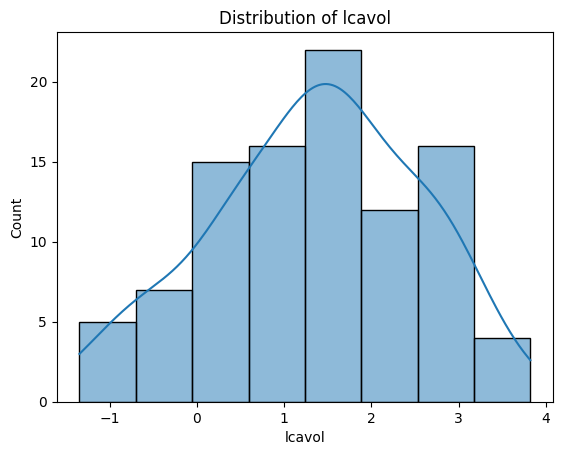

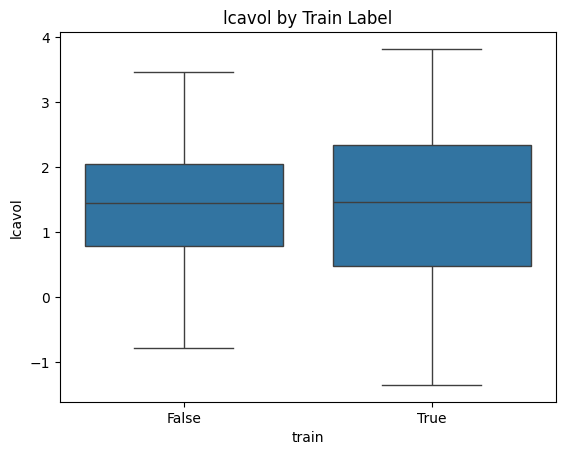

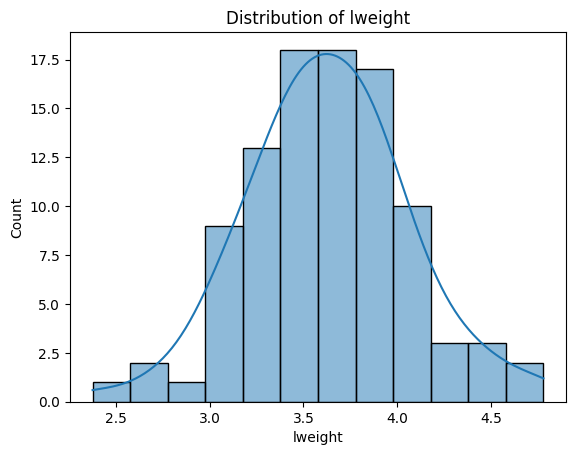

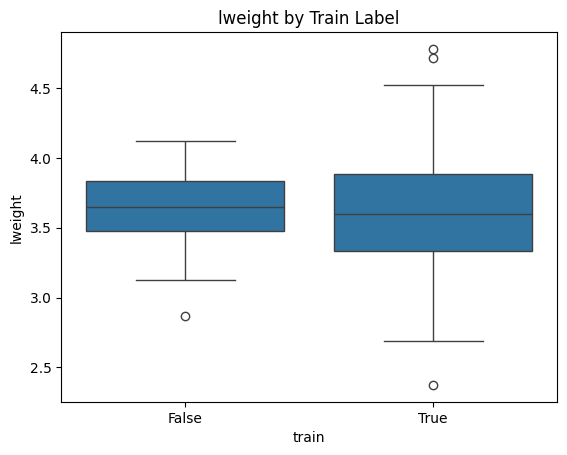

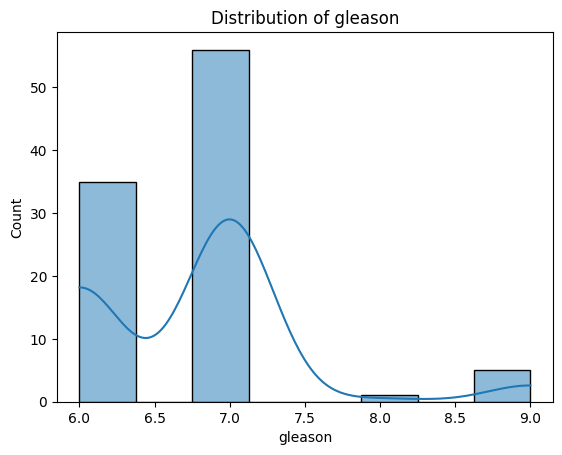

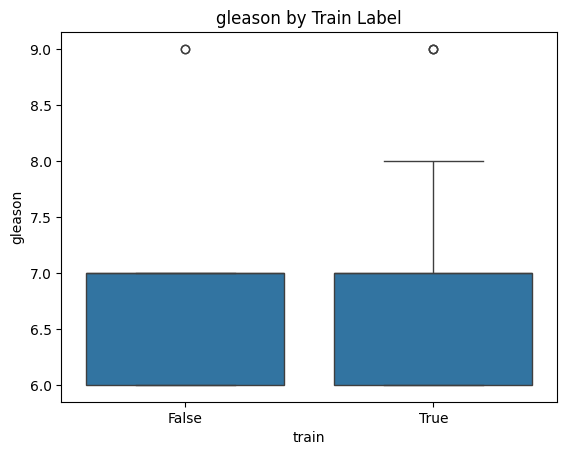

In [4]:
for col in ['lcavol', 'lweight', 'gleason']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()

    sns.boxplot(x='train', y=col, data=df)
    plt.title(f"{col} by Train Label")
    plt.show()

##  4. Classification Model

In [5]:
X = df.drop(columns=['train'])
y = df['train']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  5]
 [ 1 14]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         5
        True       0.74      0.93      0.82        15

    accuracy                           0.70        20
   macro avg       0.37      0.47      0.41        20
weighted avg       0.55      0.70      0.62        20



##  5. Feature Importance

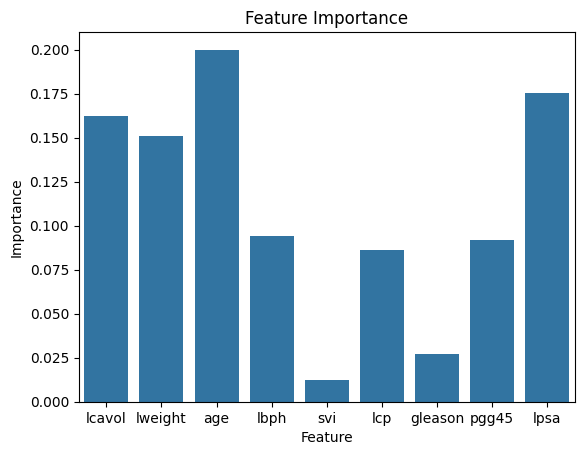

In [9]:
importances = clf.feature_importances_
feature_names = X.columns
sns.barplot(y=importances, x=feature_names)
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()

##  6. Logistic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[ 1  4]
 [ 4 11]]
              precision    recall  f1-score   support

       False       0.20      0.20      0.20         5
        True       0.73      0.73      0.73        15

    accuracy                           0.60        20
   macro avg       0.47      0.47      0.47        20
weighted avg       0.60      0.60      0.60        20



##  7. ROC Curve Analysis

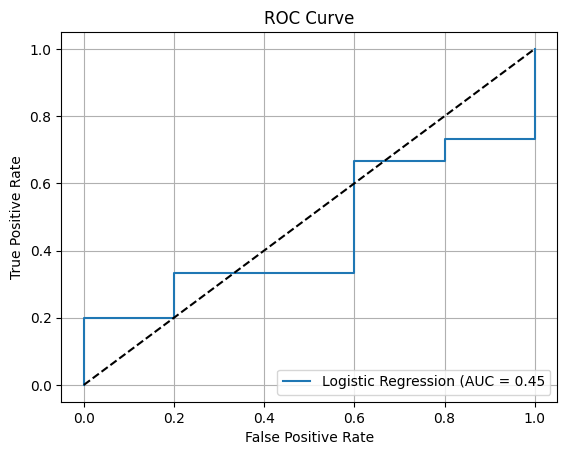

In [8]:
y_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()